# Parties analysis

* What parties have spent more money.
* Find out if a congresspeople from the same party spend money on the same places.
* Predict from what party a congressperson is from her expencies.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def read_csv(name):
    return pd.read_csv('../data/2016-08-08-%s.xz' % name,
                       parse_dates=[16],
                       dtype={'document_id': np.str,
                              'congressperson_id': np.str,
                              'congressperson_document': np.str,
                              'term_id': np.str,
                              'cnpj_cpf': np.str,
                              'reimbursement_number': np.str})

In [3]:
last_year = read_csv('last-year')

## What parties have spent more money?


In [4]:
parties_sum = last_year.groupby('party', as_index=False).sum().sort_values('net_value', ascending=False)

In [5]:
parties_sum.head()

,party,term,subquota_number,subquota_group_id,document_type,document_value,remark_value,net_value,month,year,installment,batch_number,reimbursement_value,applicant_id
6,PMDB,94848679,16369408,9857,6785,2.806593e+07,189813.23,2.736354e+07,324743,94852095,23,29466384122,1945.33,101696066
20,PT,97986309,14548132,9448,11748,2.563257e+07,132307.58,2.494036e+07,323490,97991465,25,36868647901,NaN,109635610
8,PP,73292318,12455682,6621,7550,2.034801e+07,111563.10,1.966378e+07,247883,73293610,41,23122927159,1500.00,77038009
17,PSDB,78793000,11700808,7759,7876,2.002259e+07,97022.30,1.957780e+07,265330,78794560,19,28320612807,6869.56,84473101
10,PR,56660360,9764388,6027,4567,1.722601e+07,77651.94,1.684545e+07,190840,56661800,15,18251309829,14099.26,67273680


PMDB is the most expensive party.

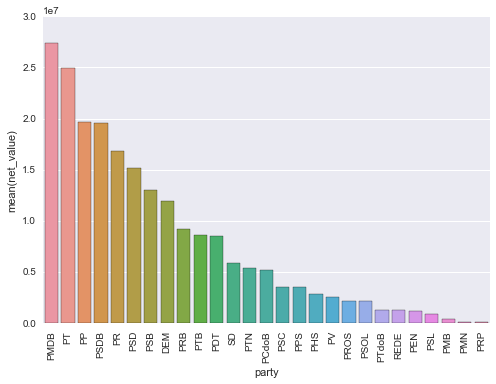

In [ ]:
sns.barplot(x='party',
            y='net_value',
            data=parties_sum)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90); None

## Find out if a congresspeople from the same party spend money on the same places.


In [4]:
parties = last_year.groupby(['party', 'cnpj_cpf'], as_index=False).count()
parties = parties[['party', 'document_id', 'cnpj_cpf']]. \
    sort_values(['party', 'document_id'], ascending=[True, False]). \
    drop_duplicates('party', keep='first')
parties.head()

,party,document_id,cnpj_cpf
303,DEM,331,02558157000162
2238,PCdoB,347,00031708000100
4398,PDT,235,16987837000106
4997,PEN,147,00031708000100
5499,PHS,192,02222736000210


In [5]:
cnpj_list = pd.read_csv('../data/cnpj_info.xz')

In [6]:
cnpj_list.iloc[0]

atividade_principal       [{'code': '36.00-6-01', 'text': 'Captação, tra...
data_situacao                                                    03/11/2005
tipo                                                                 MATRIZ
nome                           COMPANHIA DE AGUAS E ESGOTOS DE RORAIMA CAER
telefone                                                     (95) 3626-5165
atividades_secundarias    [{'code': '00.00-0-00', 'text': 'Não informada'}]
situacao                                                              ATIVA
bairro                                                            SAO PEDRO
logradouro                                                   R MELVIN JONES
numero                                                                  219
cep                                                              69.306-610
municipio                                                         BOA VISTA
uf                                                                       RR
abertura    

In [7]:
cnpj_list['cnpj'] = cnpj_list['cnpj'].str.replace(r'[.\-/]', '')

In [33]:
cnpj_list['atividade_principal'] = cnpj_list['atividade_principal'].str[33:-3]

In [37]:
merged = pd.merge(parties, cnpj_list, how='left', left_on='cnpj_cpf', right_on='cnpj')
merged[['party', 'document_id', 'nome', 'atividade_principal']]

,party,document_id,nome,atividade_principal
0,DEM,331,TELEFONICA BRASIL S.A.,Serviços de telefonia fixa comutada - STFC
1,PCdoB,347,SINDICATO DOS PERMISSIONARIOS DE TAXIS E MOTOR...,Atividades de organizações sindicais
2,PDT,235,EMPRESA GAUCHA DE RODOVIAS S/A,"Concessionárias de rodovias, pontes, túneis e ..."
3,PEN,147,SINDICATO DOS PERMISSIONARIOS DE TAXIS E MOTOR...,Atividades de organizações sindicais
4,PHS,192,EMPRESA CONCESSIONARIA DE RODOVIAS DO NORTE S/...,Administração pública em geral
5,PMB,40,ALTO UMUARAMA COMBUSTIVEIS LTDA - ME,Comércio varejista de combustíveis para veícul...
6,PMDB,640,SERVICO NACIONAL DE APRENDIZAGEM COMERCIAL SENAC,Outras atividades de ensino não especificadas ...
7,PMN,2,SABOR DA CENTENARIO COMERCIO DE ALIMENTOS EIRE...,Restaurantes e similares
8,PP,679,SINDICATO DOS PERMISSIONARIOS DE TAXIS E MOTOR...,Atividades de organizações sindicais
9,PPS,230,SERVICO NACIONAL DE APRENDIZAGEM COMERCIAL SENAC,Outras atividades de ensino não especificadas ...
